# Datos Cursadas

In [1]:
import pandas as pd
import numpy as np

In [2]:
from ydata_profiling import ProfileReport

/Users/sjaremczuk/Library/Caches/pypoetry/virtualenvs/tesis-ds-polkNLC9-py3.9/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/sjaremczuk/Library/Caches/pypoetry/virtualenvs/tesis-ds-polkNLC9-py3.9/lib/python3.9/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [3]:
#curdf = pd.read_csv('../data/interim/curdf.csv')
curdf = pd.read_pickle('../data/interim/curdf.pkl')
print('cur shape: ',curdf.shape)

cur shape:  (581295, 12)


In [4]:
curdf.columns

Index(['codigo_alumno', 'curso', 'codigo_materia', 'departamento', 'modalidad',
       'turno', 'ciclo_lectivo', 'tipo_de_aprobacion',
       'cantidad_recursada_regular', 'descripción_recursada_regular',
       'cantidad_recursada_libre', 'descripción_de_recursada_libre'],
      dtype='object')

In [5]:
curdf.head()

,codigo_alumno,curso,codigo_materia,departamento,modalidad,turno,ciclo_lectivo,tipo_de_aprobacion,cantidad_recursada_regular,descripción_recursada_regular,cantidad_recursada_libre,descripción_de_recursada_libre
0,27,K5051,952037,NaN,Presencial,Noche,2006,"Regularidad, Promoción",0,NaN,0,NaN
1,27,K5052,952052,NaN,Presencial,Noche,2006,"Regularidad, Promoción",0,NaN,0,NaN
2,27,K5151,952054,NaN,Presencial,Noche,2006,"Promoción, Regularidad",0,NaN,0,NaN
3,27,K5152,952056,NaN,Presencial,Noche,2006,"Promoción, Regularidad",0,NaN,0,NaN
4,53,K4051,952046,NaN,Presencial,Noche,2010,"Regularidad, Promoción",0,NaN,0,NaN


# Criterios de limpieza

## Criterios 

basados en el análsis del dataset hecho en el notebook 02_Analisis_Datos_Alumnos.ipynb

* `codigo_alumno`
    - id
* `curso`
    - decisión -> `usar variable`
* `codigo_materia`
    - no soportado en el analisis estadistico
        - trabajar un poco en esta variable para dsps hacer estadistica
* `departamento`
    - decisión -> `usar variable`
    - a que departamento corresponde cada materia. Una carrera puede tener materias de distintos departamentos. como las básicas que las tienen todas las carreras
* `modalidad`
    - decisión -> `eliminar variable`
    - muy desbalanceada a precencial y las que no son solo presencial son un mix entre presencila y distancia
* `turno`
    - decisión -> `usar variable`
    - 10% missing -> ver si se puede averiguar los datos que faltan o tomar criterio
* `ciclo_lectivo`
    - decisión -> `usar variable`
    - el minimo es 1997
        - tener en cuenta esto por los datos viejos de año de ingreso o nacimiento
        - puede ser un criterio para descartar otros datos y hacer limpieza o modificar pensando que el dato de año viejo no es bueno
* `tipo_de_aprobacion`
    - decision -> `usarlo solo en caso de las promociones si es que no está el registro del final`
    - Regularidad, Promoción	289237	49.8%
    - Promoción, Regularidad	286618	49.3%
    - Regularidad	5424	 0.9%
    - Promoción 16	 < 0.1%
* `cantidad_cursada_regular`
    - decision -> `usar variable`
    - cantidad de veces que recurso una materia o el numero de vez que ese ese registro en el que esta recursando la materia
        - analizar un poco mas con los casos >0 a ver bien que significa.
        - esto puede ayudar a que si no tenemos el cuatrimestre pero el registro de la materia se duplica el ciclo_lectivo y este registro incrementa en u numero, identificaria el cuatrimestre
    - tiene muchos ceros pero eso significa que curso y aprobó y no tuvo necesidad de recursar
* `descripcion_recusada_regular`
    - decision -> `usar variable`
        - es la pareja de `cantidad_cursada_regular` -> `usar una de las 2 variables` o usarla para entender bien como es la variable
* `cantidad_recursada_libre`
    - decisión -> `usar variable`
        - tiene alta correlacion con la anterior `cantidad_cusada_regular`
        - analizar bien cual es la diferencia y como utilizarlas. quizas solo haya que utilizar una sola o transformar ambas en una sola variable
* `descripcion_recursada_libre`
    - decisión -> `usar variable`
        - es la pareja de `cantidad_recursada_libre`
        - la libreria d eprofiling no la soporto, analizar manualmente

---
* `WARNING`
    - hay varias filas duplicadas
        - ver bien porque y si es realidad esta mal calculado la variable de recursadas por ser el mismo ciclo lectivo o si se duplico sin querer y hay que borrarlo

# Analisis por variables

## Variable: `codigo_materia`

In [6]:
curdf.codigo_materia.describe()

count     581295
unique       708
top       950702
freq       31716
Name: codigo_materia, dtype: object

In [7]:
pd.DataFrame(curdf.codigo_materia.unique()).to_csv('../data/interim/tmp.csv', index=False)

#### Conclusion:
- la variable `codigo_materia` es numerica pero mejor tratarla como categorica ya que es un id de materia
- `warning` -> tener cuidado porque son 701 unicos valores

In [8]:
curdf.columns

Index(['codigo_alumno', 'curso', 'codigo_materia', 'departamento', 'modalidad',
       'turno', 'ciclo_lectivo', 'tipo_de_aprobacion',
       'cantidad_recursada_regular', 'descripción_recursada_regular',
       'cantidad_recursada_libre', 'descripción_de_recursada_libre'],
      dtype='object')

## Variable: `cantidad_recursada_regular` y `cantidad_recursada_libre`

In [9]:
aux = curdf[['codigo_alumno', 'codigo_materia', 'curso', 'ciclo_lectivo' ,'cantidad_recursada_regular', 'cantidad_recursada_libre', 'tipo_de_aprobacion']].copy()
almat = aux[aux.cantidad_recursada_regular > 0][['codigo_alumno','codigo_materia']].drop_duplicates()

auxmat = pd.merge(aux, almat, how='inner', on=['codigo_alumno', 'codigo_materia'])
auxmat.sort_values(by=['codigo_alumno', 'codigo_materia', 'ciclo_lectivo', 'cantidad_recursada_regular'], inplace=True)
auxmat.head()

,codigo_alumno,codigo_materia,curso,ciclo_lectivo,cantidad_recursada_regular,cantidad_recursada_libre,tipo_de_aprobacion
452,10035,952041,K4153,2007,0,0,"Promoción, Regularidad"
451,10035,952041,K4021,2007,1,1,"Promoción, Regularidad"
453,10042,952027,K2051,2006,0,0,"Promoción, Regularidad"
454,10042,952027,K2003,2007,1,1,"Regularidad, Promoción"
455,10042,952027,K2074,2008,2,2,"Promoción, Regularidad"


In [10]:
# cuantos alumnos tienen al menos una materia recursada
auxmat.codigo_alumno.nunique()

17874

#### Conclusiones

no es factible eliminar a los alumnos q tengan al menos una recursada porque se eliminaria mas del 50% de los datos

### Analisis de los casos de recursadas

traigo temporalmente los `finales` para saber si las fechas de ciclo lectivo se puede sber a que corresponde

In [11]:
# findf = pd.read_csv('../data/interim/findf.csv')
findf = pd.read_pickle('../data/interim/findf.pkl')
print('fin shape: ',findf.shape)

fin shape:  (554523, 7)


In [12]:
findf.columns

Index(['codigo_alumno', 'codigo_materia', 'anio_academico', 'nota', 'aprobado',
       'promociono', 'año_cursada'],
      dtype='object')

In [13]:
auxcurfin = pd.merge(auxmat, findf, how='inner', on=['codigo_alumno', 'codigo_materia'])

#### Casos

---
1. caso 1:

`codigo_alumno` = 26896

`codigo_materia` = 950606

---
2. caso 2:

pareceria que en este caso aprobo y dsps recurso de nuevo: (por el año_academico en el dataset de finales y el cambio el recursada libre en el dataset de cursadas)
`alumno = 26951` y `materia 950701`

---

dataset cursadas:

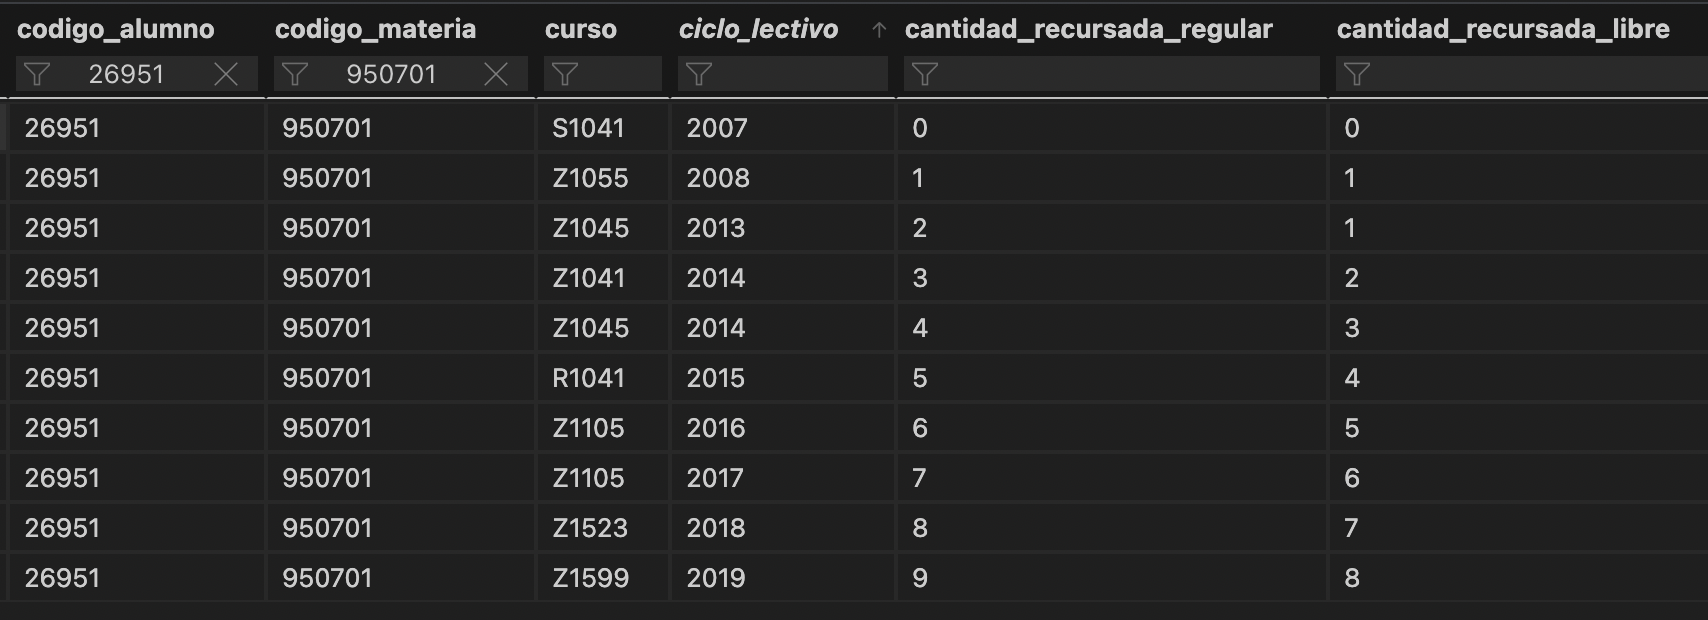

dataset finales:

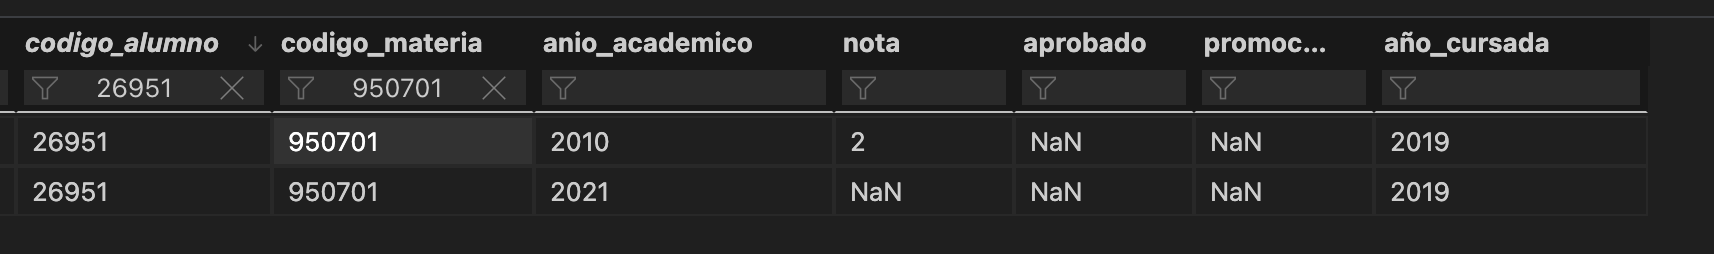

#### WARNING

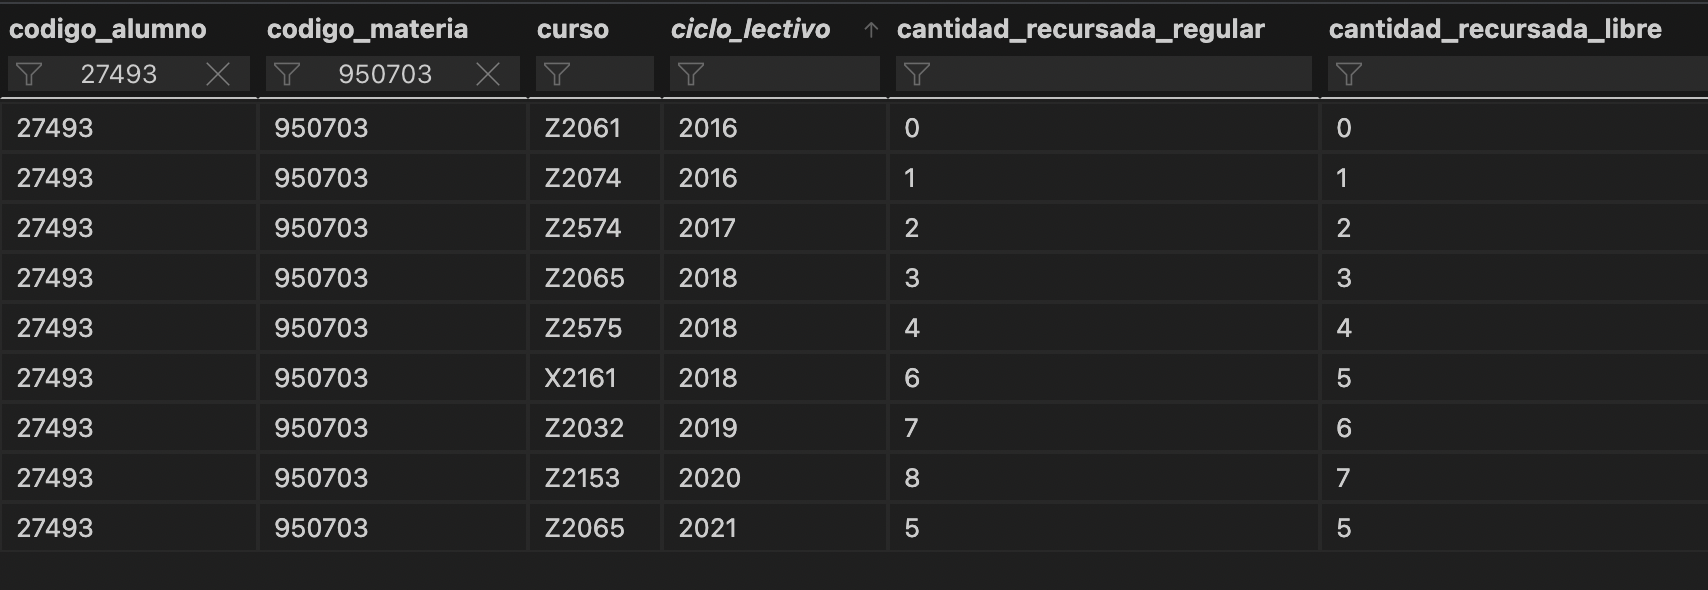

1. cual es la diferencia entre `cantidad_reursada_regular` y `cantidad_recursada_libre` ?
2. como puede ser que si indica el número de recursada, ese número sea mayor en un ciclo lectivo menor ? (para un mismo alumno y materia)

## analisis finales y dsps en cursadas

In [14]:
findf.shape

(554523, 7)

In [15]:
findfaux = findf.copy()
findfaux['cant_anio_academico'] = findf.groupby(by=['codigo_alumno', 'codigo_materia'])['anio_academico'].transform('nunique')

findfaux[findfaux.cant_anio_academico > 7][['codigo_alumno', 'codigo_materia', 'anio_academico', 'cant_anio_academico']].drop_duplicates()

,codigo_alumno,codigo_materia,anio_academico,cant_anio_academico
173611,44846,950701,2000.0,8
173614,44846,950701,2001.0,8
173617,44846,950701,2002.0,8
173619,44846,950701,2003.0,8
173620,44846,950701,2005.0,8
173621,44846,950701,2009.0,8
173622,44846,950701,2020.0,8
173623,44846,950701,2021.0,8
250568,50744,950701,2010.0,9
250570,50744,950701,2011.0,9


### WARNING

hay finales antes de cursadas:

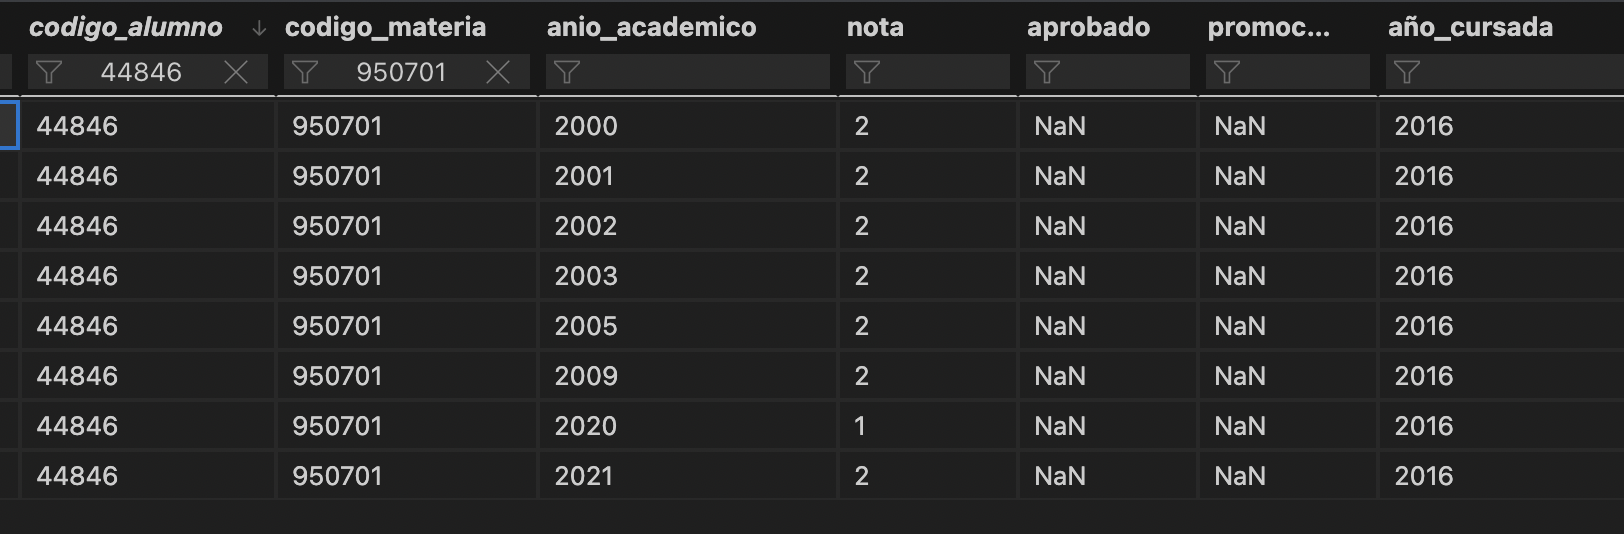

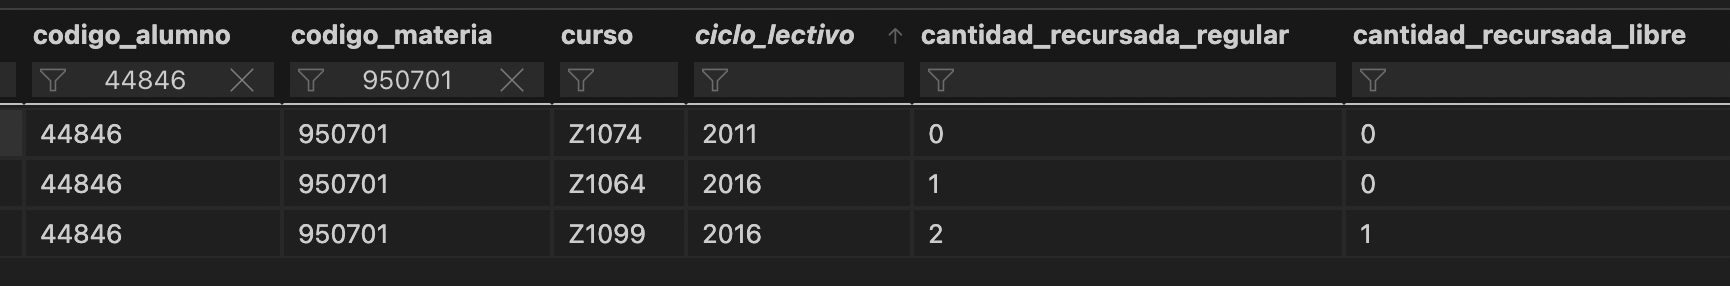

otro caso de lo mismo:

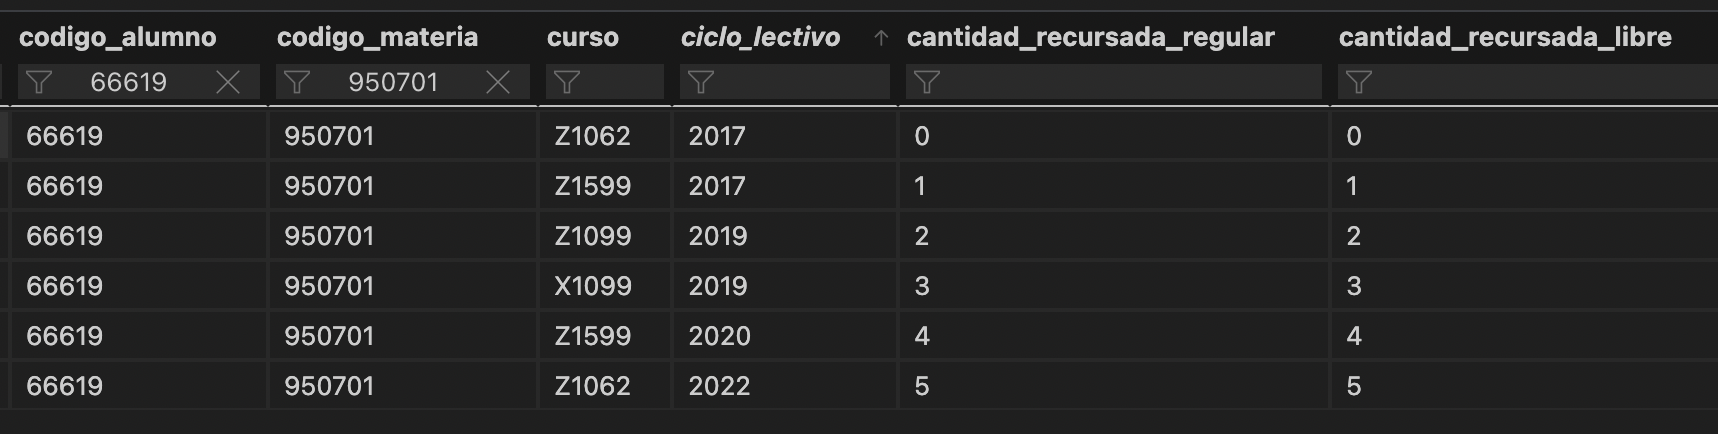

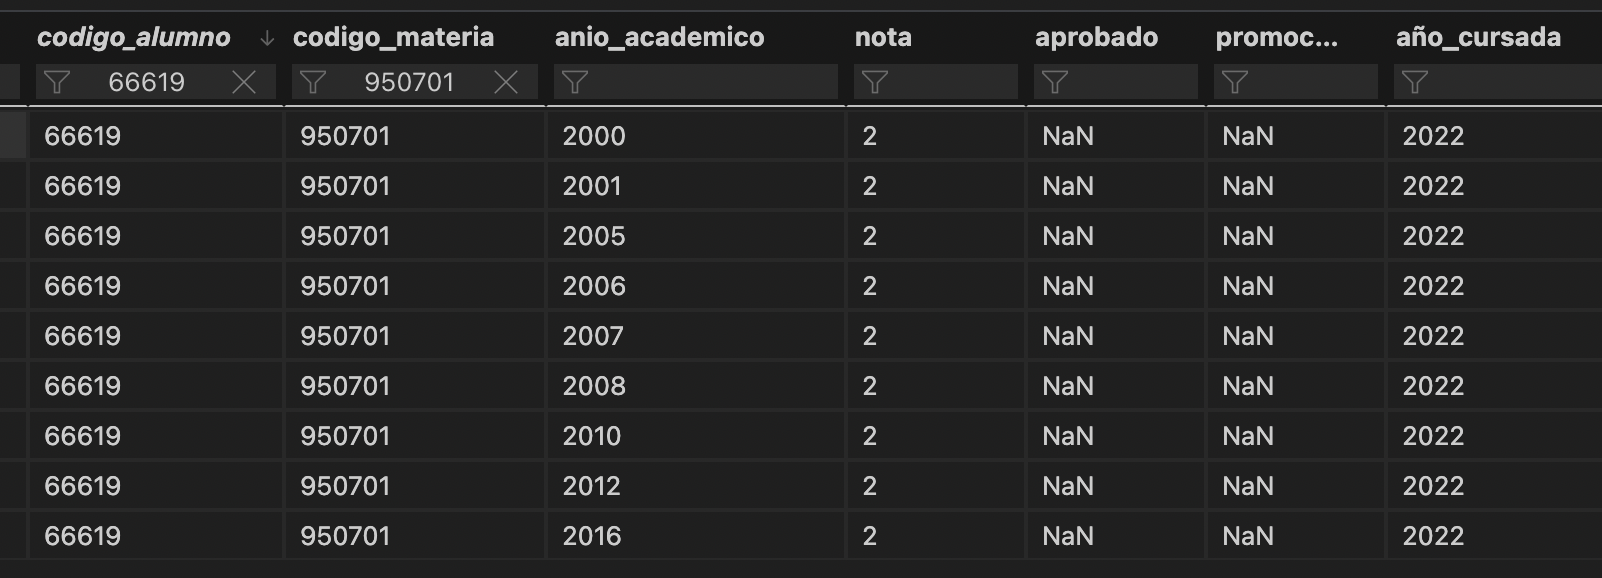

In [26]:
# datdf = pd.read_csv('../data/interim/datdf.csv')
datdf = pd.read_pickle('../data/interim/datdf_clean.pkl')
print('dat shape: ',datdf.shape)

dat shape:  (24830, 5)


In [28]:
datdf[datdf.codigo_alumno == '79982']

,codigo_alumno,sexo,anio_nacimiento,anio_ingreso,codigo_carrera_ingreso
24824,79982,M,1992,2011,I


In [29]:
curdf[(curdf.codigo_alumno == '79982') & (curdf.codigo_materia == '952540')]

,codigo_alumno,curso,codigo_materia,departamento,modalidad,turno,ciclo_lectivo,tipo_de_aprobacion,cantidad_recursada_regular,descripción_recursada_regular,cantidad_recursada_libre,descripción_de_recursada_libre
580784,79982,I3051,952540,Departamento de Ing. Industrial,Presencial,Noche,2014,"Regularidad, Promoción",0,NaN,0,NaN


### WARNING

el siguiente caso muestra que hay finales antes de cursadas. (verificado con datasets tratados y con los datos originales)

In [30]:
curdf[(curdf.codigo_alumno == '66619') & (curdf.codigo_materia == '950701')]

,codigo_alumno,curso,codigo_materia,departamento,modalidad,turno,ciclo_lectivo,tipo_de_aprobacion,cantidad_recursada_regular,descripción_recursada_regular,cantidad_recursada_libre,descripción_de_recursada_libre
424649,66619,Z1062,950701,Unidad Docente Básica Matemática,Presencial,Noche,2017,"Promoción, Regularidad",0,NaN,0,NaN
424650,66619,Z1599,950701,Unidad Docente Básica Matemática,Presencial,Mañana,2017,"Regularidad, Promoción",1,Recurso 1 vez,1,NaN
424652,66619,X1099,950701,Unidad Docente Básica Matemática,Presencial,Noche,2019,"Promoción, Regularidad",3,Recurso 3 vez,3,NaN
424653,66619,Z1099,950701,Unidad Docente Básica Matemática,Presencial,Noche,2019,"Regularidad, Promoción",2,Recurso 2 vez,2,NaN
424657,66619,Z1599,950701,Unidad Docente Básica Matemática,Presencial,Mañana,2020,"Regularidad, Promoción",4,Recurso 4 vez,4,NaN
424666,66619,Z1062,950701,Unidad Docente Básica Matemática,A distancia,NaN,2022,"Regularidad, Promoción",5,Recurso 5 vez,5,NaN


In [31]:
curdfaux = curdf.copy()

In [32]:
findf[(findf.codigo_alumno == '66619') & (findf.codigo_materia == '950701')]

,codigo_alumno,codigo_materia,anio_academico,nota,aprobado,promociono,año_cursada
418963,66619,950701,2000.0,2,NaN,NaN,2022.0
418965,66619,950701,2001.0,2,NaN,NaN,2022.0
418972,66619,950701,2005.0,2,NaN,NaN,2022.0
418976,66619,950701,2006.0,2,NaN,NaN,2022.0
418978,66619,950701,2007.0,2,NaN,NaN,2022.0
418981,66619,950701,2008.0,2,NaN,NaN,2022.0
418984,66619,950701,2010.0,2,NaN,NaN,2022.0
418992,66619,950701,2012.0,2,NaN,NaN,2022.0
418996,66619,950701,2016.0,2,NaN,NaN,2022.0


# Reglas a cumplir:

1. no puede haber finales antes de cursadas

2. no puede haber cursadas dsps de finles apobados

3. no puede haber cursadas ni finales antes de fecha de ingreso


In [33]:
curdf_minmax = curdf.groupby(by=['codigo_alumno', 'codigo_materia']).agg({'ciclo_lectivo': ['min', 'max']}).reset_index()
findf_minmax = findf.groupby(by=['codigo_alumno', 'codigo_materia']).agg({'anio_academico': ['min', 'max'], 'año_cursada': ['min', 'max']}).reset_index()

In [35]:
curdf_minmax.columns = ['codigo_alumno', 'codigo_materia', 'ciclo_lectivo_min', 'ciclo_lectivo_max']
findf_minmax.columns = ['codigo_alumno', 'codigo_materia', 'anio_academico_min', 'anio_academico_max', 'año_cursada_min', 'año_cursada_max']

In [37]:
curdf_minmax.head()


,codigo_alumno,codigo_materia,ciclo_lectivo_min,ciclo_lectivo_max
0,10035,950310,2006,2006
1,10035,952028,2007,2007
2,10035,952030,2006,2006
3,10035,952031,2007,2007
4,10035,952033,2008,2008


In [39]:
findf_minmax.head()

,codigo_alumno,codigo_materia,anio_academico_min,anio_academico_max,año_cursada_min,año_cursada_max
0,10035,950309,2006.0,2006.0,NaN,NaN
1,10035,950310,2006.0,2006.0,2006.0,2006.0
2,10035,950611,2004.0,2004.0,NaN,NaN
3,10035,950701,2003.0,2003.0,NaN,NaN
4,10035,950702,2003.0,2003.0,NaN,NaN


In [40]:
curfindf_minmax = pd.merge(curdf_minmax, findf_minmax, how='inner', on=['codigo_alumno', 'codigo_materia'])
curfindf_minmax.head()

,codigo_alumno,codigo_materia,ciclo_lectivo_min,ciclo_lectivo_max,anio_academico_min,anio_academico_max,año_cursada_min,año_cursada_max
0,10035,950310,2006,2006,2006.0,2006.0,2006.0,2006.0
1,10035,952028,2007,2007,2008.0,2008.0,2007.0,2007.0
2,10035,952030,2006,2006,2007.0,2007.0,2006.0,2006.0
3,10035,952031,2007,2007,2007.0,2007.0,2007.0,2007.0
4,10035,952033,2008,2008,2008.0,2008.0,2008.0,2008.0


In [42]:
# 1. finales antes de cursadas
curfindf_minmax['fincur'] = np.where((curfindf_minmax.anio_academico_min < curfindf_minmax.ciclo_lectivo_min), 1, 0)

curfindf_minmax['fincur'].value_counts()

0    243596
1      2663
Name: fincur, dtype: int64

In [44]:
datdf.columns

Index(['codigo_alumno', 'sexo', 'anio_nacimiento', 'anio_ingreso',
       'codigo_carrera_ingreso'],
      dtype='object')

In [47]:
curfindf_minmax.shape

(246259, 9)

In [46]:
datcurfin = pd.merge(datdf[['codigo_alumno', 'anio_ingreso']], curfindf_minmax, how='inner', on=['codigo_alumno'])
datcurfin.shape

(246259, 10)

In [48]:
datcurfin.head()

,codigo_alumno,anio_ingreso,codigo_materia,ciclo_lectivo_min,ciclo_lectivo_max,anio_academico_min,anio_academico_max,año_cursada_min,año_cursada_max,fincur
0,27,1993,952037,2006,2006,2006.0,2006.0,2006.0,2006.0,0
1,27,1993,952052,2006,2006,2006.0,2006.0,2006.0,2006.0,0
2,27,1993,952054,2006,2006,2006.0,2006.0,2006.0,2006.0,0
3,27,1993,952056,2006,2006,2006.0,2006.0,2006.0,2006.0,0
4,58,1995,952037,2007,2007,2007.0,2007.0,2007.0,2007.0,0


In [58]:
datcurfin['ingcurfin'] = np.where(
    (datcurfin.anio_ingreso - 1 >= datcurfin.ciclo_lectivo_min) | 
    (datcurfin.anio_ingreso - 1 > datcurfin.anio_academico_min) |
    (datcurfin.anio_ingreso - 1 > datcurfin.año_cursada_min), 1, 0)

datcurfin.head()

,codigo_alumno,anio_ingreso,codigo_materia,ciclo_lectivo_min,ciclo_lectivo_max,anio_academico_min,anio_academico_max,año_cursada_min,año_cursada_max,fincur,ingcurfin
0,27,1993,952037,2006,2006,2006.0,2006.0,2006.0,2006.0,0,0
1,27,1993,952052,2006,2006,2006.0,2006.0,2006.0,2006.0,0,0
2,27,1993,952054,2006,2006,2006.0,2006.0,2006.0,2006.0,0,0
3,27,1993,952056,2006,2006,2006.0,2006.0,2006.0,2006.0,0,0
4,58,1995,952037,2007,2007,2007.0,2007.0,2007.0,2007.0,0,0


In [59]:
datcurfin['ingcurfin'].value_counts()

0    244781
1      1478
Name: ingcurfin, dtype: int64

In [53]:
datcurfin_errores = datcurfin[(datcurfin.ingcurfin == 1)|(datcurfin.fincur == 1)]
datcurfin_errores.head()

,codigo_alumno,anio_ingreso,codigo_materia,ciclo_lectivo_min,ciclo_lectivo_max,anio_academico_min,anio_academico_max,año_cursada_min,año_cursada_max,fincur,ingcurfin
37,178,1984,950703,2022,2022,1997.0,1997.0,2022.0,2022.0,1,0
44,447,1995,950702,2006,2007,2005.0,2007.0,2007.0,2007.0,1,0
45,458,1999,950703,2008,2008,2007.0,2007.0,2008.0,2008.0,1,0
46,657,2002,951623,2006,2006,2005.0,2006.0,2006.0,2006.0,1,0
52,804,1994,950703,2006,2006,2005.0,2006.0,2006.0,2006.0,1,0


In [60]:
datcurfin_errores.codigo_alumno.nunique()

2673

#### conclusion:

eliminar a los alumnos con estos errores con los años

In [61]:
datcurfin_errores.to_pickle('../data/interim/alumnos_delete.pkl')

## Otras reglas que habria que verificar

a. que esten todas las materias del plan academico

b. la temporalidad en que la cursan (aunq sea la prox vez xq puede darse el caso de rescursadas dsps de dar 4 veces mas el final mientars siguienron avanzando y las solicitudes de excepciones o la gente mas vieja que antes no se pedia algunas corelativas etc etc)

c. etc